In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

In [2]:
img1 = cv2.imread("DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

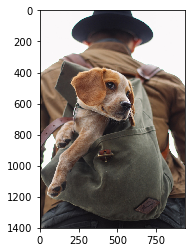

In [3]:
plt.imshow(img1)

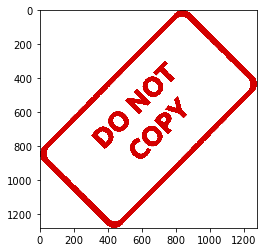

In [4]:
plt.imshow(img2)

In [5]:
print(img1.shape)
print(img2.shape)

(1401, 934, 3)
(1280, 1277, 3)


# Blending images of same size

In [6]:
img1_1200 = cv2.resize(img1, (1200, 1200))
img2_1200 = cv2.resize(img2, (1200, 1200))

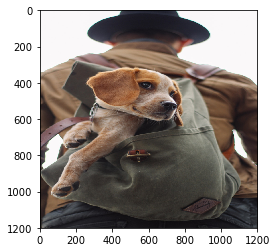

In [7]:
plt.imshow(img1_1200)

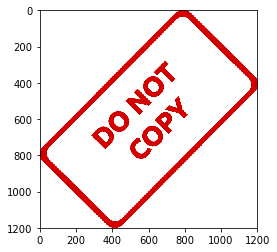

In [8]:
plt.imshow(img2_1200)

In [9]:
print(img1_1200.shape)
print(img2_1200.shape)

(1200, 1200, 3)
(1200, 1200, 3)


In [10]:
blended = cv2.addWeighted(img1_1200, 0.5, img2_1200, 0.5, 0)

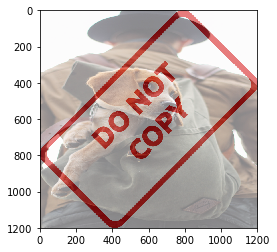

In [11]:
plt.imshow(blended)

# Blending images of different size

## 1. Overlay small image on top of a bigger image (no blending)

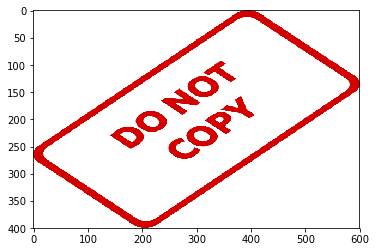

In [12]:
large_image = img1.copy()
small_image = cv2.resize(img2, (600, 400))
plt.imshow(small_image)

In [13]:
print(small_image.shape)

(400, 600, 3)


In [14]:
x_offset = 0
y_offset = 0

In [15]:
x_end = x_offset + small_image.shape[1]
y_end = y_offset + small_image.shape[0]

In [16]:
large_image[y_offset:y_end, x_offset:x_end] = small_image

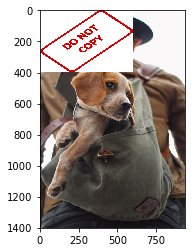

In [17]:
plt.imshow(large_image)

## 2. Blend images of different sizes

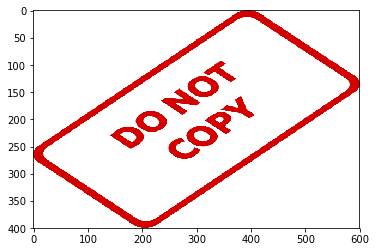

In [18]:
base_image = img1.copy()
top_image = cv2.resize(img2, (600, 400))
plt.imshow(top_image)

In [19]:
top_image.shape

(400, 600, 3)

In [20]:
x_offset = base_image.shape[1] - top_image.shape[1]
y_offset = base_image.shape[0] - top_image.shape[0]

x_end = base_image.shape[1]
y_end = base_image.shape[0]

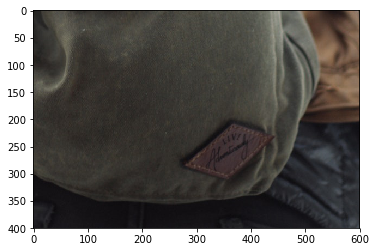

In [21]:
#Region of Interest
roi = base_image[y_offset:y_end, x_offset:x_end]
plt.imshow(roi)

In [22]:
roi.shape

(400, 600, 3)

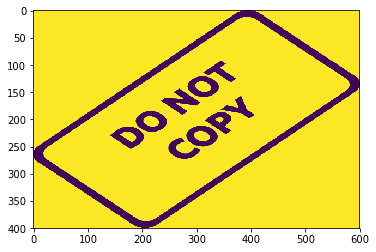

In [23]:
top_image_gray = cv2.cvtColor(top_image, cv2.COLOR_RGB2GRAY)
plt.imshow(top_image_gray)

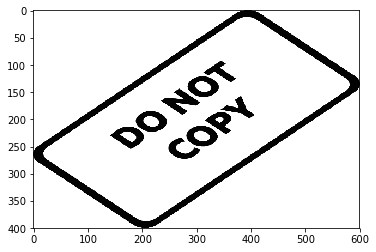

In [24]:
plt.imshow(top_image_gray, cmap='gray')

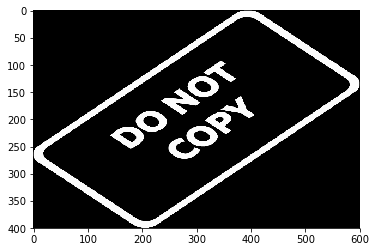

In [25]:
top_inv = cv2.bitwise_not(top_image_gray)
plt.imshow(top_inv, cmap='gray')

In [26]:
top_inv.shape # its color chanel is gone

(400, 600)

In [27]:
# now add the 3rd dimention

In [28]:
import numpy as np

In [29]:
white_background = np.full(top_image.shape, 255) # like np.zeros() or np.ones()

In [30]:
white_background.shape

(400, 600, 3)

In [31]:
bk = cv2.bitwise_or(white_background,white_background,mask = top_inv)

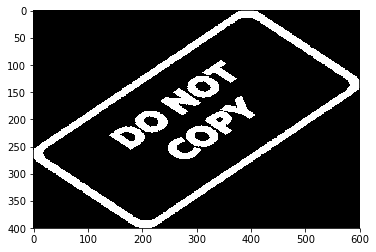

In [32]:
plt.imshow(bk)

In [33]:
bk.shape

(400, 600, 3)

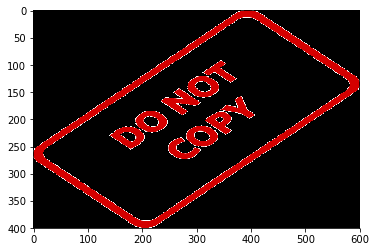

In [34]:
bk_red = cv2.bitwise_or(top_image,top_image,mask = top_inv)
plt.imshow(bk_red)

In [35]:
bk_red.shape

(400, 600, 3)

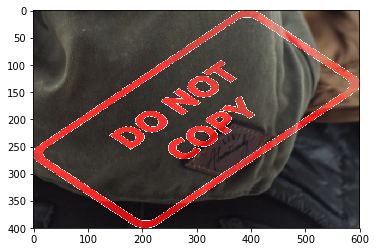

In [36]:
final_roi = cv2.bitwise_or(roi,bk_red)
plt.imshow(final_roi)

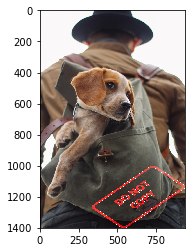

In [37]:
base_image[y_offset:y_end, x_offset:x_end] = final_roi
plt.imshow(base_image)